In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r'C:\Users\valer\OneDrive\Desktop\Python - Copy\Honolulu.xlsx')

In [3]:
def droppping_columns(df):
    
    # drop the first column
    df.drop(columns = ['Unnamed: 0'], inplace = True)
    return df



def get_area(df):
    
    # create an empty column
    df['n_area'] = 0
    
    #iterate across the indices
    for i in range(df.shape[0]):
        # get the 2nd number from the end 
        area = df['area'][i].split()[-2]
        df['n_area'][i] = area
    
    # extract the digit frim digit(ft2) str
    df['n_area'] = df['n_area'].str.extract('(\d+)')
        
    return df['n_area']


def number_bedrooms(df):
    
    # extract the number of bedrooms that stay before letter 'br'
    df['n_bedrooms'] = df['area'].str.extract('(\d+)br')
    
    return df['n_bedrooms']

def price_num(df):
    
    # replace the unnecessary symbols by empty space
    df['n_price'] = df['price'].str.replace('$','').str.replace(',','')
    
    return df['n_price']

# looking for a beach

def a_beach(df):
    
    # create a list of words to be found
    find = 'beach'
    # get the False or True of the string that has Beach or beach in it
    df['beach_availability'] = df['info'].str.contains('beach', flags=re.IGNORECASE, regex=True) 
    
    return df['beach_availability']


# get the date of the post_date

def get_a_day(df):
    
    # split the post_date by dash and extract the last values (days)
    df['day_posted'] = df['post_date'].apply(lambda x: x.split('-')[-1])
    
    return  df['day_posted']


def day_available(df):
    
    # extract the last two digits from the string
    df['day_available'] = df['add_info'].str.extract('(\s+)[a-zA-Z]{3,}(\s+)(\d+)')[2]
    
    return df['day_available']


# sooner available the more expensive it is


def n_bathrooms(df):
    
    # get the number preceeds 'Ba'
    df['n_bathrooms'] = df['add_info'].str.extract('(\d+)Ba')
    
    return df['n_bathrooms'] 
    
def get_coordinates(df):
    
    # get the last two values from a string
    df['geo_coordinates'] = df['coordinates'].apply(lambda x: x.split('/')[-1])
    
    return df['geo_coordinates']



def smoking(df):
    
    # create a list of words to be found
    smoke = ['smoking']
    #yes for smokers and no for non-smoking rooms
    df['smoking'] = df['allowed'].apply(lambda x: 'True' if x in smoke else 'False').astype(bool)
    
    
    return df['smoking']


def main(df):
    df = droppping_columns(df)
    df['n_area'] = get_area(df)
    df['n_bedrooms'] = number_bedrooms(df)
    df['n_price'] = price_num(df)
    df['beach_availability'] = a_beach(df)
    df['day_posted'] = get_a_day(df)
    df['day_available'] = day_available(df)
    df['n_bathrooms'] = n_bathrooms(df)
    df['geo_coordinates'] = get_coordinates(df)
    df['smoking'] = smoking(df)
    
    return df
    

In [4]:
df_cleaned = main(df)

<ipython-input-3-cf369745f773>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['n_area'][i] = area
C:\Users\valer\anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


<IPython.core.display.Javascript object>

In [5]:
def drop_unnecessary_columns(df):
    # drop unmodified columns
    df = df.iloc[:, 9:]
    return df 

In [6]:
df = drop_unnecessary_columns(df_cleaned)
df.head()

,n_area,n_bedrooms,n_price,beach_availability,day_posted,day_available,n_bathrooms,geo_coordinates,smoking
0,800,NaN,1950,True,16,NaN,1,[],True
1,480,1,1520,False,19,19,1,"21.287535,-157.820367",True
2,380,NaN,1500,True,30,30,1,"21.286107,-157.838986",True
3,400,1,1380,False,24,NaN,1,[],True
4,650,1,1025,False,24,24,1,[],True


In [7]:
def geo_conv(df):
    
    # extract the geo coordinates from latitude messy column
    df['latitude'] = df['geo_coordinates'].apply(lambda x: x.split(',')[0])
    df['latitude'] = df['latitude'].apply(lambda x: np.nan if x == '[]' else x)


    # extract the geo coordinates from longtitude messy column
    df['longitude'] = df['geo_coordinates'].apply(lambda x: x.split(',')[1] if len(x)== 21 else np.nan)
    df['longitude'] = df['longitude'].apply(lambda x: np.nan if x == '[]' else x)

    return df

In [8]:
df = geo_conv(df)

In [9]:
def columns_to_numeric(df):
    
    #iterate acroos columns
    for col in df.columns:
        #convert each columns to numerical values
        try:
            df[col] = df[col].astype(int)
        except:
            df[col] = pd.to_numeric(df[col], errors = 'coerce')
            
    return df

In [10]:
df = columns_to_numeric(df)

In [11]:
def correct_area(df):
    
    # all apartments with area less than 70 sqft are converted to Nan values
    df.loc[df['n_area'] < 70]['n_area'] = np.nan
    df['n_area'] = df['n_area'].apply(lambda x: None if x < 70 else x)
    
    # Using the price variable, which corresponfss to an area, I will impute the missing area values
    df['n_area'] = df.groupby('n_price').n_area.transform(lambda x: x.fillna(x.mean()))
    
    return df

df = correct_area(df)

<ipython-input-11-56d88ef7393b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['n_area'] < 70]['n_area'] = np.nan


In [12]:
# drop unnecessary columns
def drop_columns(df, col):
    df.drop(columns = [col], axis = 1, inplace = True)
    return df

cols = ['geo_coordinates']
for col in cols:
    df = drop_columns(df, col)

In [13]:
df = df[['n_area', 'n_bedrooms', 'beach_availability', 'day_posted',
       'day_available', 'n_bathrooms', 'smoking', 'latitude', 'longitude', 'n_price']]

In [14]:
#dropping columns
def drop_nan(df, variable):
    df[variable+'_dropped'] = df[variable].fillna(0)
    return df


# mode imputation
def impute_nan_mode(df, variable):
    df[variable+'_mode'] = df[variable].fillna(2.0)
    return df


# median imputation
def impute_nan_median(df, variable):
    median = df[variable].median()
    df[variable+'_median'] = df[variable].fillna(median)
    return df

# Random sample imputation peaks random data to replace the nan values applied for MCAR
def impute_nan_random(df,variable):
    median = df[variable].median()
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample
    variable = df['n_area']
    return df


# by outliers
def impute_by_outliers(df):
    extreme = df.n_area.mean() + 3*df.n_area.std()
    df['n_area_extreme'] = df['n_area'].fillna(extreme)
    return df

# group by Price. Trying to predict the missing n_bedrooms by the grouping known n_bedrooms by apartment price, and 
# filling unknown n_bedrooms values that corresponds to the n_price variable
def impute_by_Price(df, variable1, variable2):
    df[variable1 + '_by_' + variable2] = df[variable1].fillna(df.groupby(variable2)[variable1].transform('median'))
    return df

In [15]:
drop_nan(df, 'n_area')
impute_nan_mode(df, 'n_area')
impute_nan_median(df, 'n_area')
impute_nan_random(df,'n_area')
impute_by_Price(df, 'n_area', 'n_price')

impute_by_outliers(df)

,n_area,n_bedrooms,beach_availability,day_posted,day_available,n_bathrooms,smoking,latitude,longitude,n_price,n_area_dropped,n_area_mode,n_area_median,n_area_random,n_area_by_n_price,n_area_extreme
0,800.0,NaN,1,16,NaN,1,1,NaN,NaN,1950,800.0,800.0,800.0,800.0,800.0,800.0
1,480.0,1.0,0,19,19.0,1,1,21.287535,-157.820367,1520,480.0,480.0,480.0,480.0,480.0,480.0
2,380.0,NaN,1,30,30.0,1,1,21.286107,-157.838986,1500,380.0,380.0,380.0,380.0,380.0,380.0
3,400.0,1.0,0,24,NaN,1,1,NaN,NaN,1380,400.0,400.0,400.0,400.0,400.0,400.0
4,650.0,1.0,0,24,24.0,1,1,NaN,NaN,1025,650.0,650.0,650.0,650.0,650.0,650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3115,650.0,2.0,0,23,24.0,1,1,NaN,NaN,1900,650.0,650.0,650.0,650.0,650.0,650.0
3116,1188.0,2.0,1,23,7.0,2,1,21.272499,-157.820749,2895,1188.0,1188.0,1188.0,1188.0,1188.0,1188.0
3117,1000.0,2.0,0,16,NaN,5,1,NaN,NaN,1800,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
3118,750.0,2.0,1,23,1.0,5,1,20.780922,-156.458284,2650,750.0,750.0,750.0,750.0,750.0,750.0


In [16]:
#dropping columns
def drop_nan(df, variable):
    df[variable+'_dropped'] = df[variable].fillna(0)
    return df


# mode imputation
def impute_nan_mode(df, variable):
    df[variable+'_mode'] = df[variable].fillna(2.0)
    return df


# median imputation
def impute_nan_median(df, variable):
    median = df[variable].median()
    df[variable+'_median'] = df[variable].fillna(median)
    return df

# Random sample imputation peaks random data to replace the nan values applied for MCAR
def impute_nan_random(df,variable):
    median = df[variable].median()
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample
    variable = df['n_bedrooms']
    return df

# group by Price. Trying to predict the missing n_bedrooms by the grouping known n_bedrooms by apartment price, and 
# filling unknown n_bedrooms values that corresponds to the n_price variable
def impute_by_Price(df, variable1, variable2):
    df[variable1 + '_by_' + variable2] = df[variable1].fillna(df.groupby(variable2)[variable1].transform('median'))
    return df

In [17]:
drop_nan(df, 'n_bedrooms')
impute_nan_mode(df, 'n_bedrooms')
impute_nan_median(df, 'n_bedrooms')
impute_nan_random(df,'n_bedrooms')
impute_by_Price(df, 'n_bedrooms', 'n_price')

,n_area,n_bedrooms,beach_availability,day_posted,day_available,n_bathrooms,smoking,latitude,longitude,n_price,...,n_area_mode,n_area_median,n_area_random,n_area_by_n_price,n_area_extreme,n_bedrooms_dropped,n_bedrooms_mode,n_bedrooms_median,n_bedrooms_random,n_bedrooms_by_n_price
0,800.0,NaN,1,16,NaN,1,1,NaN,NaN,1950,...,800.0,800.0,800.0,800.0,800.0,0.0,2.0,2.0,2.0,NaN
1,480.0,1.0,0,19,19.0,1,1,21.287535,-157.820367,1520,...,480.0,480.0,480.0,480.0,480.0,1.0,1.0,1.0,1.0,1.0
2,380.0,NaN,1,30,30.0,1,1,21.286107,-157.838986,1500,...,380.0,380.0,380.0,380.0,380.0,0.0,2.0,2.0,3.0,1.0
3,400.0,1.0,0,24,NaN,1,1,NaN,NaN,1380,...,400.0,400.0,400.0,400.0,400.0,1.0,1.0,1.0,1.0,1.0
4,650.0,1.0,0,24,24.0,1,1,NaN,NaN,1025,...,650.0,650.0,650.0,650.0,650.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3115,650.0,2.0,0,23,24.0,1,1,NaN,NaN,1900,...,650.0,650.0,650.0,650.0,650.0,2.0,2.0,2.0,2.0,2.0
3116,1188.0,2.0,1,23,7.0,2,1,21.272499,-157.820749,2895,...,1188.0,1188.0,1188.0,1188.0,1188.0,2.0,2.0,2.0,2.0,2.0
3117,1000.0,2.0,0,16,NaN,5,1,NaN,NaN,1800,...,1000.0,1000.0,1000.0,1000.0,1000.0,2.0,2.0,2.0,2.0,2.0
3118,750.0,2.0,1,23,1.0,5,1,20.780922,-156.458284,2650,...,750.0,750.0,750.0,750.0,750.0,2.0,2.0,2.0,2.0,2.0


In [18]:
df = df[['beach_availability', 'n_area_random', 'n_bedrooms_mode', 'n_bathrooms',
          'day_posted', 'n_price']]

In [19]:
def new_features(df):
    
    # lets normalize the price variable. The most sense would make to divide calculate the price of 1 meter.
    df['cost_square_meter'] = (df['n_price']/df['n_area_random'])/0.092903 # feet to meters


    # convert to numerical values coercing errors
    df['bedrooms_to_bathrooms'] = df['n_bedrooms_mode']/df['n_bathrooms']
    
    
    # take the diff between posted and the todays date
    # data got scraped on the 24th of July
    
    df['day_diff'] = df['day_posted'].apply(lambda x: (24 - x) if x <=24 else (24 + 30 - x))
    
    return df

In [20]:
df = new_features(df)

<ipython-input-19-4d14cc90011c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cost_square_meter'] = (df['n_price']/df['n_area_random'])/0.092903 # feet to meters
<ipython-input-19-4d14cc90011c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bedrooms_to_bathrooms'] = df['n_bedrooms_mode']/df['n_bathrooms']
<ipython-input-19-4d14cc90011c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

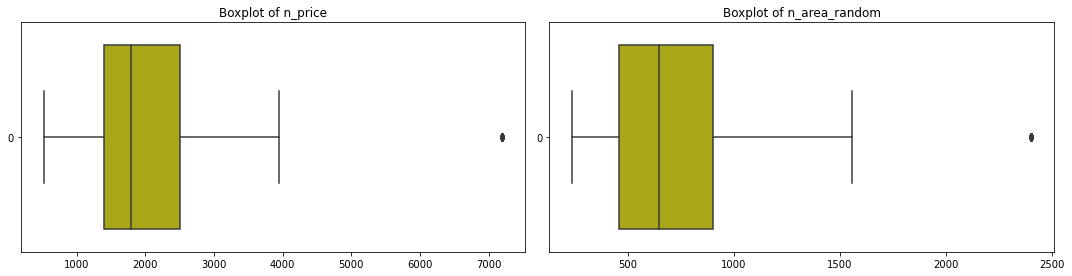

In [21]:
#Frequency of each category separated by label
plt.figure(figsize=[15,18])
feafures = ['n_price', 'n_area_random']
#take all columns except the target Selling_Price
n=1
for f in feafures:
    plt.subplot(5,2,n)
    sns.boxplot(data = df[f], orient='h', color = 'y')
    plt.title("Boxplot of {}".format(f))
    n=n+1
plt.tight_layout()
plt.show()

In [22]:

def outliers_imputation(df, cols):
    
    #calculating the Interquartile range of a feature
    
    for col in cols:
        
        IQR=df[col].quantile(0.75)-df[col].quantile(0.25)

        #calculating the borders of the normal distribution of Chance_of_Admit
        lower_bridge=df[col].quantile(0.25)-(IQR*1.5)
        upper_bridge=df[col].quantile(0.75)+(IQR*1.5)

        #Inpute the outliers with the min values that are present for the normal distribution of Chance_of_Admit
        df.loc[df[col]<=lower_bridge, col]=lower_bridge
        df.loc[df[col]>=upper_bridge, col]=upper_bridge
    
    return df

In [23]:
# lets impute outliers that are on the left side of cost_square_meter_mode_log
cols = ['n_price', 'n_area_random']
df = outliers_imputation(df, cols)

C:\Users\valer\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

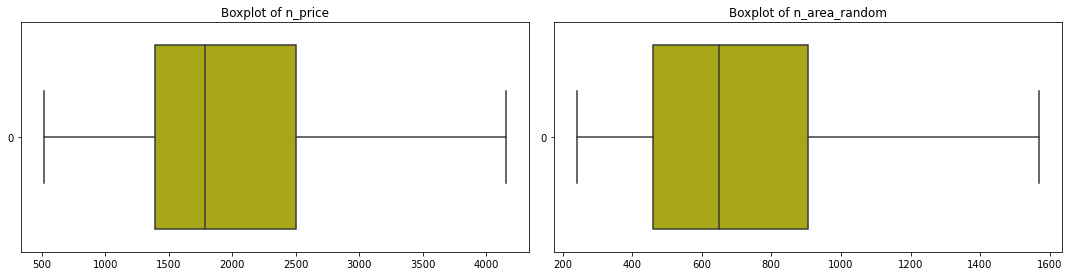

In [24]:
#Frequency of each category separated by label
plt.figure(figsize=[15,18])
feafures = ['n_price', 'n_area_random']
#take all columns except the target Selling_Price
n=1
for f in feafures:
    plt.subplot(5,2,n)
    sns.boxplot(data = df[f], orient='h', color = 'y')
    plt.title("Boxplot of {}".format(f))
    n=n+1
plt.tight_layout()
plt.show()

In [25]:
# final dataset

df = df[['beach_availability', 'n_area_random', 'n_bathrooms',
        'day_posted', 'n_price']]

In [26]:
df.isna().sum()

beach_availability    0
n_area_random         0
n_bathrooms           0
day_posted            0
n_price               0
dtype: int64

In [27]:
# preparing data for the train_test_split
X = df.iloc[:,:-1]
Y = df.iloc[:, -1]

In [28]:
# split data into test (20%) and train (80%) parts
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (2496, 4)
x test:  (624, 4)
y train:  (2496,)
y test:  (624,)


In [29]:
# uploading Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_st = sc.fit_transform(X_train)
X_test_st = sc.transform(X_test)

In [30]:
# fir Random Forest with the best hyperparameters
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators= 1600,
 min_samples_split= 10,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= None,
 bootstrap= True, random_state = 42)

# fir train data to the model
rf.fit(X_train_st, y_train)

# find predictions
predictions = rf.predict(X_test_st)

In [31]:
from sklearn.model_selection import cross_val_score

#calculate cross validated R2
R2 = cross_val_score(rf, X=X_train_st, y=y_train,cv=10, scoring='r2').mean()  


#display adjusted R-squared
#calculate Adj R2
n= len(X_train)
p = len(X_train.columns)
adj_R2 = 1- ((1-R2) * (n-1)/(n-p-1))

In [32]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("R2 score =", round(metrics.r2_score(y_test, predictions), 2))
print("adjR2 score =", round(adj_R2, 2))

MAE: 86.42512622967598
MSE: 94164.48185291178
RMSE: 306.8623174208781
R2 score = 0.86
adjR2 score = 0.89


In [33]:
import pickle
with open('Forest.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [34]:
df.head()

,beach_availability,n_area_random,n_bathrooms,day_posted,n_price
0,1,800.0,1,16,1950.0
1,0,480.0,1,19,1520.0
2,1,380.0,1,30,1500.0
3,0,400.0,1,24,1380.0
4,0,650.0,1,24,1025.0
